In [27]:
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
import numpy as np

In [5]:
titanic=pd.read_csv('/Users/Mezbah/Documents/train.csv')

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [8]:
titanic.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
len(titanic)

891

In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [26]:
#query method 
titanic.query('(Survived==1) & (Pclass==3) & (Sex=="male") & (Age<18)')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,NaN,C
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.00,0,2,363291,20.5250,NaN,S
220,221,1,3,"Sunderland, Mr. Victor Francis",male,16.00,0,0,SOTON/OQ 392089,8.0500,NaN,S
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.00,4,2,347077,31.3875,NaN,S
348,349,1,3,"Coutts, Master. William Loch ""William""",male,3.00,1,1,C.A. 37671,15.9000,NaN,S
489,490,1,3,"Coutts, Master. Eden Leslie ""Neville""",male,9.00,1,1,C.A. 37671,15.9000,NaN,S
751,752,1,3,"Moor, Master. Meier",male,6.00,0,1,392096,12.4750,E121,S
788,789,1,3,"Dean, Master. Bertram Vere",male,1.00,1,2,C.A. 2315,20.5750,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.00,1,1,347742,11.1333,NaN,S


In [33]:
def male_female_child(passenger):
    age,sex = passenger
    if age<16:
        return 'child'
    else:
        return sex

In [36]:
#separating child from male and female

titanic['person']=titanic[['Age','Sex']].apply(male_female_child,axis=1)

In [37]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


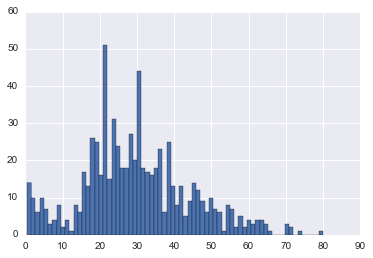

In [40]:
#seeing the age distributions
titanic['Age'].hist(bins=70)

In [48]:
titanic['Age'].mean()

29.69911764705882

In [50]:
titanic['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

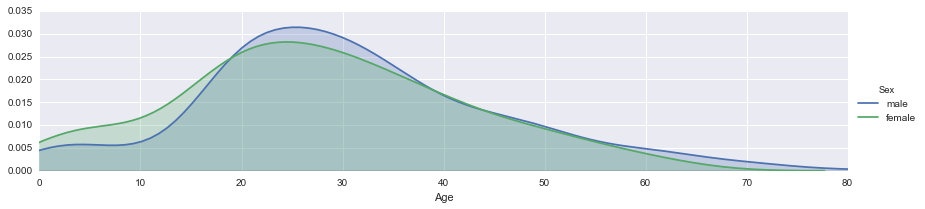

In [53]:
#kernel density plots
fig=sns.FacetGrid(titanic,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

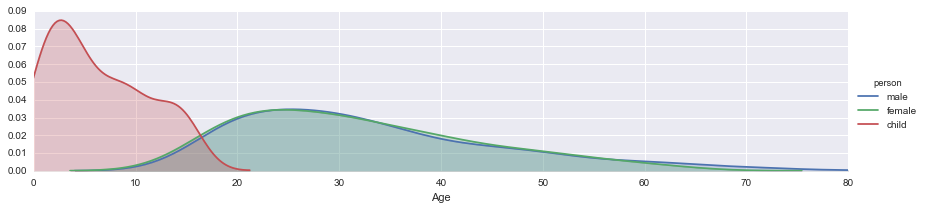

In [54]:
fig=sns.FacetGrid(titanic,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

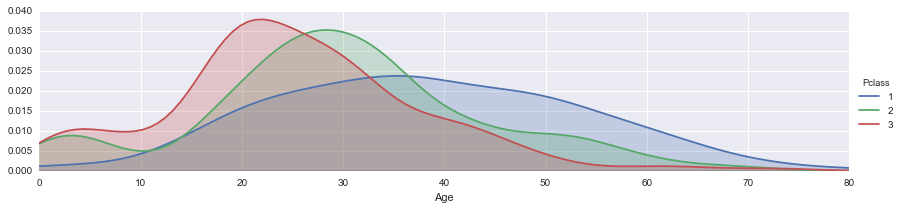

In [55]:
fig=sns.FacetGrid(titanic,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [56]:
deck=titanic['Cabin'].dropna()

In [57]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [59]:
levels=[]
for level in deck:
    levels.append(level[0])


In [66]:
cabin_df=DataFrame(levels)
cabin_df.columns=['Cabin']
cabin_df.head()


,Cabin
0,C
1,C
2,E
3,G
4,C


In [67]:
def status(passenger):
    SibSp,Parch = passenger
    if SibSp+Parch>0:
        return 'Family'
    else:
        return 'Alone'

In [69]:
titanic['status']=titanic[['SibSp','Parch']].apply(status,axis=1)

In [70]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,status
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone


In [73]:
titanic.status.value_counts()

Alone     537
Family    354
Name: status, dtype: int64

In [77]:
titanic.query('(Survived==0) & (status=="Family")')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Family
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,Family
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,male,Family
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,child,Family
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S,female,Family
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S,child,Family
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,male,Family
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,male,Family
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S,male,Family
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S,female,Family


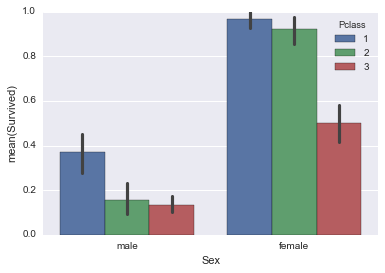

In [99]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=titanic);

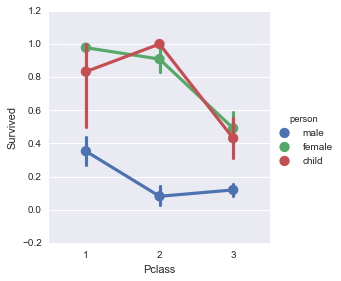

In [100]:
sns.factorplot(x="Pclass", y="Survived", hue="person",data=titanic);

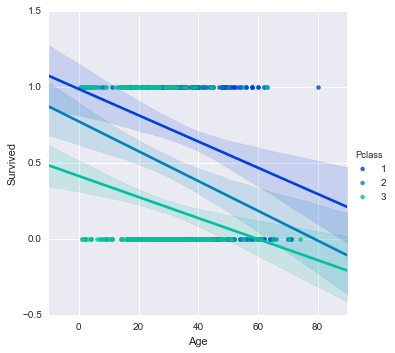

In [102]:
sns.lmplot('Age','Survived',hue='Pclass',palette='winter',data=titanic)


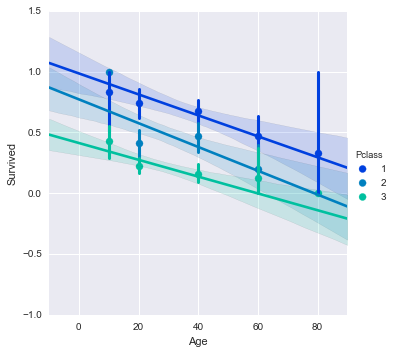

In [104]:
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',palette='winter',x_bins=generations,data=titanic)

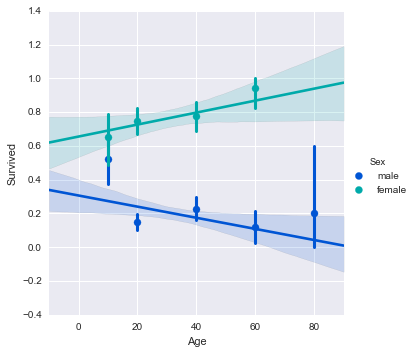

In [105]:
sns.lmplot('Age','Survived',hue='Sex',palette='winter',x_bins=generations,data=titanic)

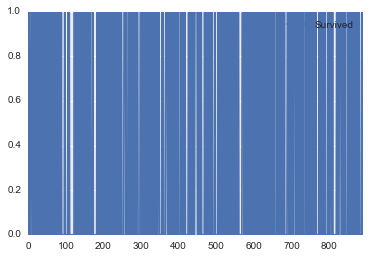

In [108]:

# Let's see a historical view of the closing price
titanic['Survived'].plot(legend=True)
